# Medical Insurance Cost Prediction using Machine Learning 

# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Reading the Dataset 

In [6]:
df = pd.read_csv("C:/Users/harkaran/Downloads/Insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
#Checking the first five rows of the data 

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Checking for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 

As we can see there is no missing values in the data 

In [9]:
#Checking some more information on the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#Checking the statistical measures of the data 

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\harkaran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age Column')

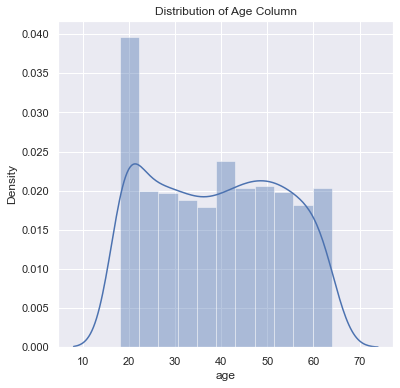

In [11]:
#Checking the distribution of Age column

sns.set()

plt.figure(figsize = (6,6))

sns.distplot(df['age'])

plt.title('Distribution of Age Column')

# 
As we can notice from the distribution that most number of persons are in the bracket of 20 to 22.

Text(0.5, 1.0, 'Distrbution of sex column')

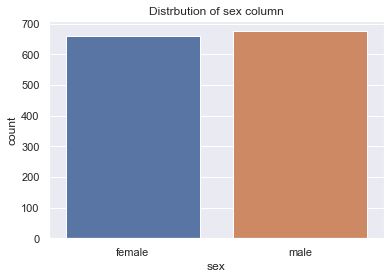

In [13]:
#Creating another graph for Sex column
#Using Countplot since its a Categorical data 

sns.set()

sns.countplot( x = 'sex', data = df)

plt.title('Distrbution of sex column')

# 

Since the distribution is almost the same but majority of male is higher.

In [14]:
#We can also check it by another method

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\harkaran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bmi column')

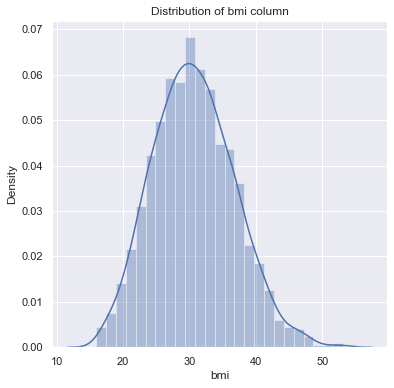

In [15]:
#Checking the distribution of BMI column

plt.figure(figsize = (6,6))

sns.distplot(df['bmi'])

plt.title('Distribution of bmi column')




# 

As we can see bmi column is normally distributed. The normal BMI range is 18.5 to 24.9. In this case if your less than 18.5 it falls under Underweight and if it is more than 24.9 it falls under Overweight.

Text(0.5, 1.0, 'Distribution of Children column')

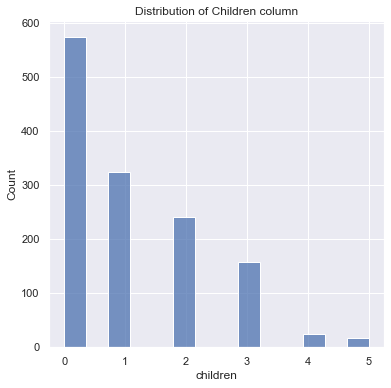

In [16]:
#Checking for children column

plt.figure( figsize = (6,6))

sns.histplot(data = df, x ='children')

plt.title('Distribution of Children column')

In [17]:
#Checking the count for children column 

df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# 

The above distribution tells us that:-
* 574 People has 0 children.
* 324 People has 1 children.
* 240 People has 2 children.
* 157 People has 3 children.
* 25 People has 4 children.
* 18 People has 5 children. 

Text(0.5, 1.0, 'Distribution of Smoker column')

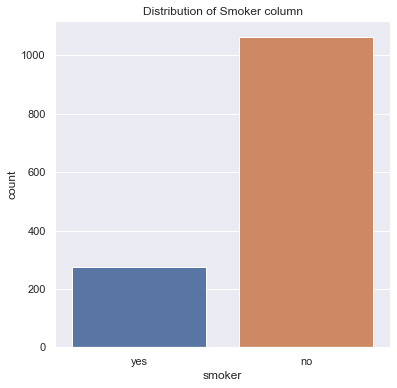

In [18]:
#checking for smoker column as well

plt.figure( figsize = (6,6))

sns.countplot(x = 'smoker',  data = df)

plt.title('Distribution of Smoker column')

In [19]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

As we can see Most number of people are non smokers. 

Text(0.5, 1.0, 'Distribution of region column')

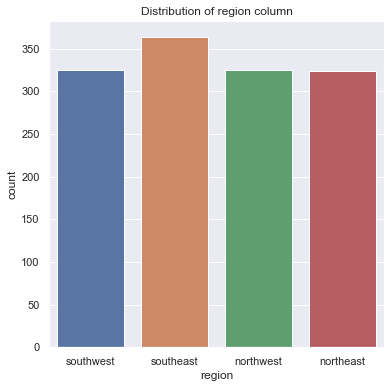

In [20]:
#checking for region column as well

plt.figure( figsize = (6,6))

sns.countplot(x = 'region',  data = df)

plt.title('Distribution of region column')

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\harkaran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges column')

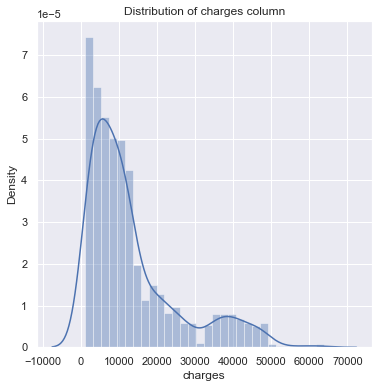

In [22]:
#checking for charges column as well

plt.figure( figsize = (6,6))

sns.distplot(df['charges'])

plt.title('Distribution of charges column')

The above distribution shows that the data is distributed between 10000 to 30000.

# Encoding the Categorical Features.

Since Machine learning algorithms understands numerical values better. So, encoding them into numerical features.

Categorical Columns we have in our Dataset:-

* Sex.
* Smoker.
* Region

In [23]:
#encoding the sex column 

df.replace({'sex':{'male': 0, 'female': 1}}, inplace = True)

#encoding the smoker column

df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace = True)

#encoding the region column

df.replace({'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3 }}, inplace = True)

df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


In [24]:
#checking the bottom of the dataset

df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,2,10600.5483
1334,18,1,31.92,0,1,3,2205.9808
1335,18,1,36.85,0,1,1,1629.8335
1336,21,1,25.80,0,1,0,2007.9450
1337,61,1,29.07,0,0,2,29141.3603


# Splitting the target column and features.

In [25]:
#Dropping the target column and storing it in another variable

X = df.drop(columns = 'charges', axis =1)

Y = df['charges']

In [26]:
X #printing the X column

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,1
1336,21,1,25.800,0,1,0


In [27]:
Y #printing the Y column

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Splitting the data into training and test data 

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size = 0.8 ,test_size = 0.2, random_state = 2)


In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training using Linear Regression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation 

In [32]:
#Prediction on training data 

training_data_prediction = lr.predict(X_train)


In [33]:
#Calculating the r2 score on training dataset

r2_train = metrics.r2_score(Y_train, training_data_prediction)

print('R2 value for training data :', r2_train)


R2 value for training data : 0.7519923667088932


As we know if the R2 square value is near to 1 our model is performing well. So, in this case our R square value is good.

In [34]:
#prediction on test data

test_data_prediction = lr.predict(X_test)

In [35]:
#Calculating the r2 score on test_data

r2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R2 value for test data :', r2_test)

R2 value for test data : 0.7445422986536503


From the above results we can see that our test and training data R square score is close to each other which also means that our model is not Overfitting neither it is Underfitting.

# Building a Predictive system

In [37]:
Enter_data = (28,0,33,3,1,1)

#converting the data into numpy array

Enter_data_as_numpy_array = np.asarray(Enter_data)

#reshaping the array 

Enter_data_reshaped = Enter_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(Enter_data_reshaped)

print('The Insurance cost is:', prediction)

s



The Insurance cost is: [7290.41681042]


# Summary

* No missing values in the data.
* Categorical columns is treated by Encoding.
* Training data stands 0.75 and test data stands at 0.74